<a href="https://colab.research.google.com/github/felipe-sanches/desafio-anatel/blob/main/desafio_anatel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio Técnico
Processo Seletivo de Estágio - ANATEL

In [ ]:
#importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#importando base de dados para dataframe
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DESAFIO - Anatel/Base de dados final.xlsx - Sheet1.csv')

# Identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]),"\n")

#Verificando quantidade de valores ausentes em cada variável do dataset
print('Valores ausentes no Dataset:')
print(df.isnull().sum(), '\n')

#Tipos de dados contidos no dataset
print('Tipos de dados:')
display(df.dtypes)

Entradas:	 16836
Variáveis:	 8 

Valores ausentes no Dataset:
Unidade de Lotação    0
Processo SEI          0
Tipo de Processo      0
Usuários              0
Atividades            0
Tipo de Ação          0
Pontuação             0
Data Entrega          0
dtype: int64 

Tipos de dados:


Unidade de Lotação    object
Processo SEI          object
Tipo de Processo      object
Usuários              object
Atividades            object
Tipo de Ação          object
Pontuação             object
Data Entrega          object
dtype: object

In [ ]:
#verificando primeiras entradas do dataset
df.head()

,Unidade de Lotação,Processo SEI,Tipo de Processo,Usuários,Atividades,Tipo de Ação,Pontuação,Data Entrega
0,GR01FI3,01245.123456/2021-69,Fiscalização: Outorga,Marco Rossi,TEC_13_1 - Elaborar documentação de fiscalização,Análise,4,22/01/2021
1,FIGF,01245.123457/2020-58,Fiscalização: Radiodifusão,Andrea Russo,FIGF_14_1 - Preparar resposta a demandantes 1,Análise,4,09/11/2020
2,FIGF,01245.123457/2020-58,Fiscalização: Radiodifusão,Giuseppe Ferrari,FIGF_14_1 - Preparar resposta a demandantes 1,Revisão,"0,5",09/11/2020
3,FIGF,01250.123459/2016-11,Demanda Externa: Órgãos Governamentais Federais,Antonio Esposito,FIGF_14_1 - Preparar resposta a demandantes 1,Análise,4,24/02/2021
4,FIGF,01250.123459/2016-11,Demanda Externa: Órgãos Governamentais Federais,Antonio Esposito,FIGF_14_1 - Preparar resposta a demandantes 1,Revisão,0,26/02/2021


# Visualização 1
Qual a proporção de Fiscais envolvidos na análise de atividades centralizadas, em relação ao total de Fiscais? 

In [ ]:
#Filtrando os ficais
fiscais = df.loc[df['Unidade de Lotação'] != 'FIGF']

#verificando atraves do metodo describe a quantidade total de usuarios que sao fiscais
fiscais['Usuários'].describe()

count           15100
unique            331
top       Lucca Mason
freq              604
Name: Usuários, dtype: object

In [ ]:
#filtrando entre os registros total dos fiscais, quais registros são de análises
analise = fiscais.loc[fiscais['Tipo de Ação'] == 'Análise']


In [ ]:
#definindo quais sao as atividades centralizadas
centr = analise[analise['Atividades'].str.contains("SERV")]
centr = centr[centr['Atividades'].str.contains("entr")]
centr1= centr[centr['Atividades'].str.contains("SERV_08")]

result = centr.loc[centr.index.difference(centr1.index)]

#
print(result['Atividades'].value_counts())

SERV_18_3_25%-PARCIAL Relat. Centraliz. Recorrente       46
SERV_18_3 - Relatório Centralizada Recorrente            40
SERV_02_2 - Anali. e planej. centraliz. recorrente       30
SERV_18_4 - Relatório - Centralizada Não Recorrente      21
SERV_18_4_25%-PARCIAL Relat. Centraliz. Ñ Recor.         16
SERV_02_2_50%-PARCIAL Ana.e plan. centra. recorr.        15
SERV_11_1 - Acompanhar Parciais pelo centralizador       14
SERV_02_3_25%-PARCIAL Anali. e Plan. Centr. ñ Recorr.     9
SERV_02_3 - Anali. e plan. centraliz. ñ recorrente        9
SERV_18_4_50%-PARCIAL Relat. Centraliz. Ñ Recor.          8
SERV_18_3_50%-PARCIAL Relat. Centraliz. Recorrente        8
SERV_02_2_25%-PARCIAL Ana.e plan. centra. recorr.         7
SERV_02_3_50%-PARCIAL Anali. e Plan. Centr. ñ Rec.        4
SERV_03_2_25%-PARCIAL Plan Coor. Centr. Coordenador       2
SERV_18_4_10%-PARCIAL Relat. Centraliz. Ñ Recor.          2
SERV_03_2_50%-PARCIAL Plan Coord Centr Coordenador        1
SERV_11_1_25%-PARCIAL Acompa. Parc.centr

In [ ]:
total = fiscais['Usuários'].unique()
atvcentr = result['Usuários'].unique()

print('Total de fiscais:', len(total))
print('Fiscais Envolvidos na analise de atv centralizada:', len(atvcentr))

Total de fiscais: 331
Fiscais Envolvidos na analise de atv centralizada: 60


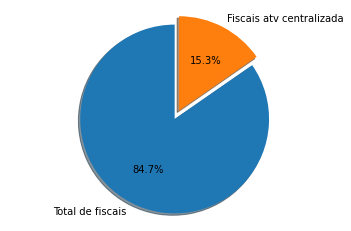

In [ ]:
# Grafico de Pizza apresentando a proporção
labels = 'Total de fiscais', 'Fiscais atv centralizada'
sizes = [len(total), len(atvcentr)]
explode = (0, 0.1)  

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Visualizacao 2

Grafico de Barras.

In [ ]:
from datetime import datetime

In [ ]:
#Convertendo a coluna Data Entrega para o tipo datetime
df['Data Entrega'] = pd.to_datetime(df['Data Entrega'])

#Trocando virgulas por pontos e convertendo a coluna Pontuação para o tipo Float 
df['Pontuação'] = df['Pontuação'].str.replace(',', '.')
df['Pontuação'] = df['Pontuação'].astype(float)

#determinando o periodo de tempo
periodo = df.loc[(df['Data Entrega'] > '2020-11-01') & (df['Data Entrega'] <= '2021-03-31')]

In [ ]:
soma = periodo['Pontuação'].groupby(periodo['Usuários']).sum()

score = soma.sort_values(ascending= True).tail(10)

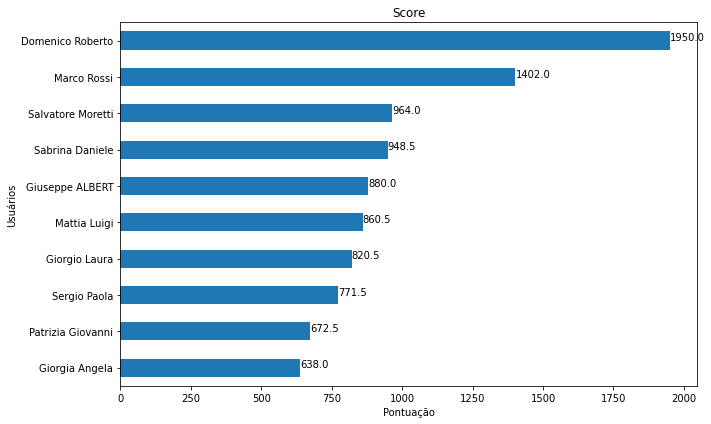

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

score.plot(x="Usuários", kind="barh", ax=ax)

ax.set_title("Score")
ax.set_xlabel("Pontuação")
ax.set_ylabel("Usuários")

for index, value in enumerate(score):
    plt.text(value, index, str(value))

plt.tight_layout()

#Visualizacao 3

In [ ]:
#Encontrando a unidade que mais pontuou
agrupapont = df['Pontuação'].groupby(df['Unidade de Lotação']).sum()

ordenapont = agrupapont.sort_values(ascending= False).head(10)

vis3 = df.loc[df['Unidade de Lotação'] == ordenapont.index[0]]

In [ ]:
#tratando a variavel 'Data Entrega'
vis3['Data Entrega'] = vis3['Data Entrega'].dt.strftime('%Y-%m')

#Agrupando contagem de atividades por mes
atividade = vis3['Atividades'].groupby(vis3['Data Entrega']).count()

print(atividade.head())

Data Entrega
2020-02     1
2020-03    30
2020-04    46
2020-05    10
2020-06    20
Name: Atividades, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


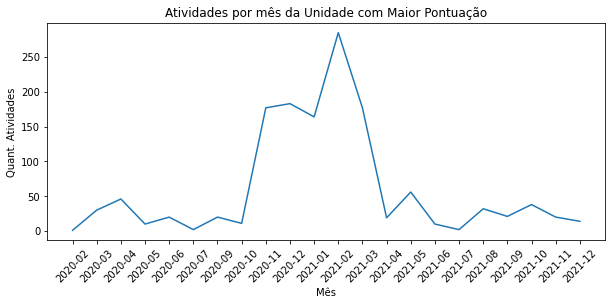

In [ ]:
# plotando gráfico de analise 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))

atividade.plot(kind="line",ax=ax)

ax.set_xlabel("Mês")
ax.set_ylabel("Quant. Atividades")
ax.set_title("Atividades por mês da Unidade com Maior Pontuação")
plt.xticks(range(0,len(atividade.index)), atividade.index, rotation = 45)

plt.show()